In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

## Load Data

In [2]:
df = pd.read_csv("data/METABRIC_RNA_Mutation.csv", low_memory = False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
clinic_data = df.loc[:, df.columns[:31]]
clinic_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
genomic_data = df.loc[:, df.columns[31:]]
genomic_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,0,0,0,0,0,0,0,0,0,0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0,0,0,0,0,0,0,0,0,0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0,0,0,0,0,0,0,0,0,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0,0,0,0,0,0,0,0,0,0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,0,0,0,0,0,0,0,0,0,0


## Detecting Missing Values

In [5]:
#Finding missing data and the percentage of it in each column
total = genomic_data.isnull().sum().sort_values(ascending = False)
percent = (genomic_data.isnull().sum() / genomic_data.isnull().count()).sort_values(ascending=False)
missing_genomic = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_genomic.head()

,total_null,percent_null
brca1,0,0.0
bche,0,0.0
cdkn2c,0,0.0
cyb5a,0,0.0
cyp11a1,0,0.0


In [6]:
#Finding missing data and the percentage of it in each column
total = clinic_data.isnull().sum().sort_values(ascending = False)
percent = (clinic_data.isnull().sum() / clinic_data.isnull().count()).sort_values(ascending=False)
missing_clinic = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_clinic.head(14)

,total_null,percent_null
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


In [7]:
total = 0
for i in missing_clinic['total_null']:
    total += i
print(total)

1100


In [8]:
clinic_data.shape

(1904, 31)

## Filling the Missing Values

Since we have 1100 missing values, we should fill in instead of drop out.

### Visualize the Columns w/ Missing Values

tumor_stage


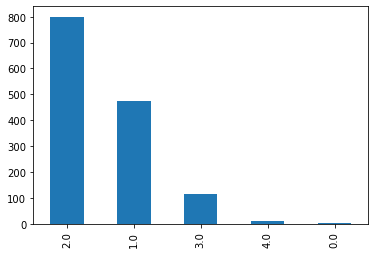

3-gene_classifier_subtype


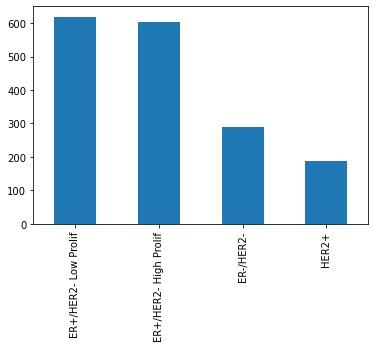

primary_tumor_laterality


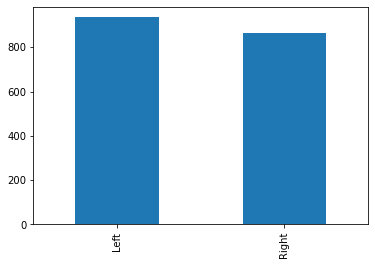

neoplasm_histologic_grade


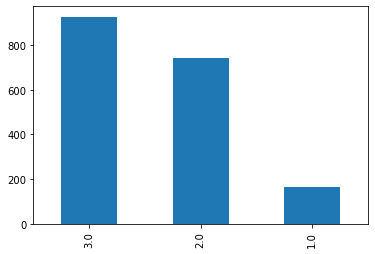

cellularity


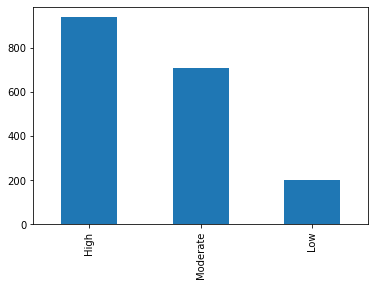

mutation_count


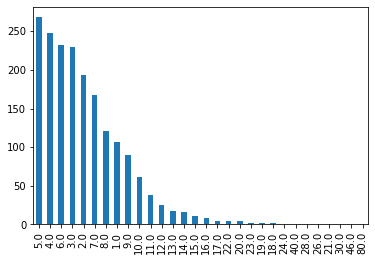

er_status_measured_by_ihc


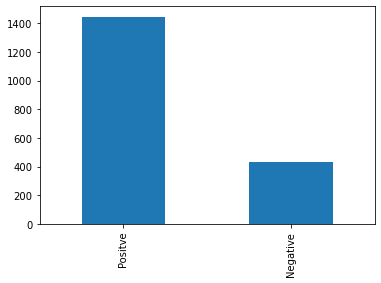

type_of_breast_surgery


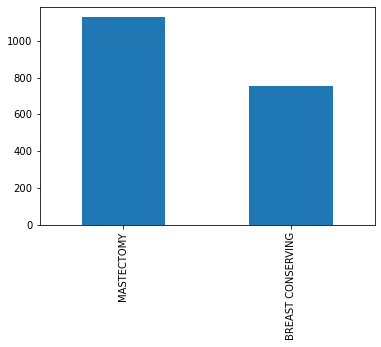

tumor_size


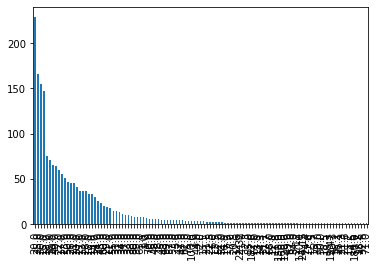

cancer_type_detailed


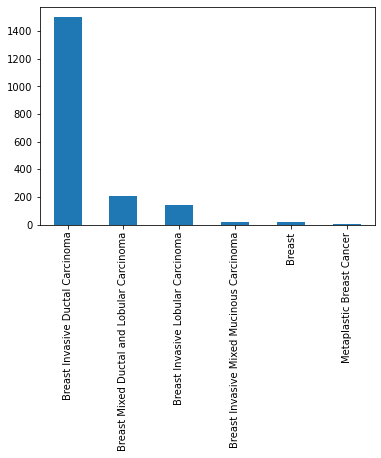

tumor_other_histologic_subtype


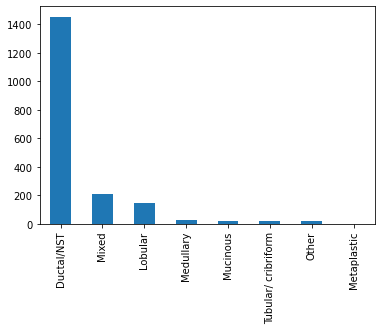

oncotree_code


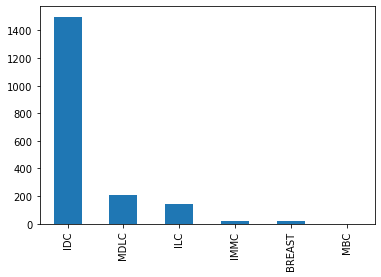

death_from_cancer


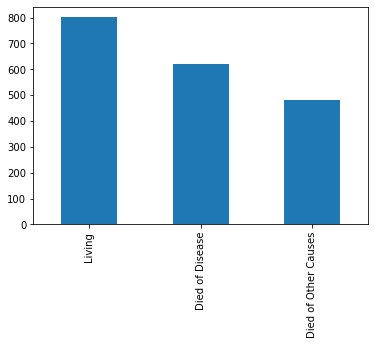

In [9]:
for missing_column in missing_clinic.index[:13]:
    df[missing_column].value_counts().plot.bar()
    print(missing_column)
    plt.show()

In [10]:
for column in missing_clinic.index[:13]:
    df[column].fillna(df[column].mode()[0], inplace=True)

#df = df.dropna()

In [11]:
df.isnull().sum().value_counts()

0    693
dtype: int64

In [12]:
df.shape

(1904, 693)

## Drop Columns & Value Counts & Interpreting Data

In [13]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for i in df.columns:
    unique_values = np.unique(df[i])
    print(i)
    print(unique_values)

patient_id
[   0    2    5 ... 7297 7298 7299]
age_at_diagnosis
[21.93 26.36 26.72 ... 90.43 92.14 96.29]
type_of_breast_surgery
['BREAST CONSERVING' 'MASTECTOMY']
cancer_type
['Breast Cancer' 'Breast Sarcoma']
cancer_type_detailed
['Breast' 'Breast Invasive Ductal Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma' 'Metaplastic Breast Cancer']
cellularity
['High' 'Low' 'Moderate']
chemotherapy
[0 1]
pam50_+_claudin-low_subtype
['Basal' 'Her2' 'LumA' 'LumB' 'NC' 'Normal' 'claudin-low']
cohort
[1. 2. 3. 4. 5.]
er_status_measured_by_ihc
['Negative' 'Positve']
er_status
['Negative' 'Positive']
neoplasm_histologic_grade
[1. 2. 3.]
her2_status_measured_by_snp6
['GAIN' 'LOSS' 'NEUTRAL' 'UNDEF']
her2_status
['Negative' 'Positive']
tumor_other_histologic_subtype
['Ductal/NST' 'Lobular' 'Medullary' 'Metaplastic' 'Mixed' 'Mucinous'
 'Other' 'Tubular/ cribriform']
hormone_therapy
[0 1]
inferred_menopausal_state
[

dtx2
[-4.5026 -3.673  -3.3585 ...  3.7987  3.8453  4.0397]
dtx3
[-3.1155 -2.9552 -2.8669 ...  5.0146  5.7424 10.5253]
dtx4
[-2.9105 -2.822  -2.7781 ...  3.9687  4.3242  5.9302]
ep300
[-4.3758 -3.6466 -3.6178 ...  3.0556  3.2786  3.3097]
fbxw7
[-2.0713 -2.0333 -2.017  ...  4.3024  4.6286  4.7139]
hdac1
[-5.9821 -3.6187 -3.3309 ...  4.1262  4.1429  4.1961]
hdac2
[-3.7861 -2.8023 -2.582  ...  3.238   3.6208  3.7939]
hes1
[-3.7008 -3.4673 -3.0636 ...  3.0975  3.1827  4.5158]
hes5
[-2.3126 -2.2856 -2.1935 ...  4.97   12.5922 17.1431]
heyl
[-2.9563 -2.9232 -2.8065 ...  3.4244  4.4446  5.1303]
itch
[-3.2882 -3.023  -2.9652 ...  4.5175  5.1252  6.7771]
jag1
[-3.0058 -2.6388 -2.5331 ...  4.4352  4.5818  7.0501]
jag2
[-3.6459 -3.1405 -2.8915 ...  3.397   3.4888  3.7708]
kdm5a
[-4.3789 -3.4416 -3.2661 ...  4.8134  5.0267  5.7061]
lfng
[-2.9711 -2.968  -2.7482 ...  2.9399  3.0455  3.1072]
maml1
[-3.812  -3.5079 -3.4115 ...  3.9159  4.2531  4.4105]
maml2
[-2.4091 -2.285  -2.2218 ...  5.4675  5.7232

bcas3
[-2.6722 -2.5583 -2.4503 ...  5.2038  5.2799  5.3337]
birc6
[-3.7095 -2.8426 -2.7819 ...  3.5771  3.6328  3.6815]
cacna2d3
[-1.8355 -1.7349 -1.7196 ...  5.749   6.095   6.5529]
ccnd3
[-3.399  -3.1929 -3.0766 ...  3.9418  4.1803  4.7764]
chd1
[-2.9229 -2.706  -2.6353 ...  4.2343  4.2663  4.5072]
clk3
[-3.0581 -2.9667 -2.9392 ...  4.2042  4.8925  5.5333]
clrn2
[-3.0708 -3.0154 -2.7782 ...  4.7303  4.7425  5.3658]
col12a1
[-2.843  -2.8026 -2.7664 ...  2.5345  2.5901  2.6088]
col22a1
[-1.2151 -1.1885 -1.1873 ...  6.4181  6.6062  8.1668]
col6a3
[-5.148  -3.8594 -3.8451 ...  2.1968  2.2038  2.2869]
ctcf
[-5.4334 -5.2865 -3.7916 ...  3.7901  4.2735  8.0724]
ctnna1
[-6.188  -5.1636 -4.9635 ...  2.5789  2.6036  2.9347]
ctnna3
[-3.4568 -3.0948 -3.0828 ...  3.6633  4.3096  5.3332]
dnah11
[-2.3076 -2.2538 -2.1895 ...  8.5131  9.1885 15.1319]
dnah2
[-1.6609 -1.6301 -1.6291 ...  4.6175  4.9067  5.6279]
dnah5
[-3.2482 -2.9835 -2.8423 ...  4.5295  4.819   6.5357]
dtwd2
[-2.6441 -2.5155 -2.4638 .

adgra2_mut
['0' 'A1275D' 'C1196Y' 'C1196Y L944V' 'C1196Y R362H' 'E312K' 'E325*'
 'E863Q' 'G1308R' 'G705A' 'G723D' 'G764V' 'H1170Efs*4' 'I522T' 'L155Sfs*7'
 'L934F' 'P1115T' 'P395L' 'P953L' 'Q378E' 'Q468*' 'Q832R' 'R100C' 'R143W'
 'R362H' 'R369Q' 'R564K' 'R593H' 'R600K' 'R799H' 'R999Q' 'S1116Lfs*150'
 'S1276G' 'S1334N' 'S726L' 'T122A' 'T1315I' 'T314M' 'T397P' 'T683I'
 'V614M' 'V772L' 'Y929C']
ubr5_mut
['0' 'A1046Rfs*49' 'A1738S' 'A2524T' 'A404V' 'D16E' 'D2361=' 'D2592N'
 'D752Y' 'E2121A' 'F1278V' 'F1436Lfs*4' 'K1818R' 'K2320R' 'L120V' 'L2004F'
 'L2144V' 'L773F' 'M1911T' 'N2319S' 'P1020R' 'P1035T' 'P1518S' 'P640L'
 'Q463*' 'R1379W' 'R1417C' 'R1854H' 'R1898=' 'R1899*' 'R1900H' 'R813Q'
 'R946H' 'S1641R' 'S2011C' 'S753C' 'S913G' 'T1065A' 'T1400A' 'V2127M'
 'V766E' 'V871E' 'V8I' 'X1142_splice' 'X1191_splice']
pik3r1_mut
['0' 'A658P' 'D168G' 'D464_R465delinsE' 'D560delinsGQTYEQH*TN'
 'F398_E411del' 'G321S' 'G376E' 'G665S' 'I133M' 'I571_L573del'
 'K567_I571delinsN' 'K567_L570del' 'K567_L570del

klrg1_mut
['0' 'C176Y' 'C75F' 'N84K' 'S31P' 'X186_splice']
mbl2_mut
['0' 'A120T A120E' 'A17S' 'K132*' 'S85F']
mtap_mut
['0' 'A213S' 'A247S' 'I138M' 'I255L']
ppp2cb_mut
['0' 'G128V' 'I224S' 'R110C' 'R254Q']
smarcd1_mut
['0' 'L434M' 'M366T' 'N84S' 'P78R']
nras_mut
['0' 'D108N' 'G12S' 'T124A']
ndfip1_mut
['0' 'A50T' 'N68S' 'X51_splice']
hras_mut
['0' 'N86T' 'Q61R']
prps2_mut
['0' 'G255R' 'I159F']
smarcb1_mut
['0' 'D159N' 'I28L']
stmn2_mut
['0' 'N145K' 'R156H']
siah1_mut
['0' 'T249A']


In [15]:
# death_from_cancer, gene_classifier_subtype, pr_status, oncotree_code, integrative_cluster, inferred_menopausal_state,
# tumor_other_histologic_subtype, her2_status, her2_status_measured_by_snp6, er_status, er_status_measured_by_ihc,
# pam50_+_claudin-low_subtype, cellularity, type_of_breast_surgery, cancer_type_detailed

# Ordinal (Label)
# cellularity, cancer_type_detailed, type_of_breast_surgery, her2_status_measured_by_snp6, pam50_+_claudin-low_subtype,
# her2_status_measured_by_snp6, tumor_other_histologic_subtype, integrative_cluster, 3-gene_classifier_subtype,
# death_from_cancer

# Nominal (One Hot)
# er_status_measured_by_ihc, er_status, her2_status, inferred_menopausal_state, primary_tumor_laterality, pr_status,
# oncotree_code

## Label Encoding (Ordinal)

In [16]:
ordinal_df = df[['cellularity','cancer_type_detailed','type_of_breast_surgery',
                       'her2_status_measured_by_snp6','pam50_+_claudin-low_subtype',
                       'her2_status_measured_by_snp6','tumor_other_histologic_subtype',
                       'integrative_cluster','3-gene_classifier_subtype','death_from_cancer']]
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,claudin-low,NEUTRAL,Ductal/NST,4ER+,ER-/HER2-,Living
1,High,Breast Invasive Ductal Carcinoma,BREAST CONSERVING,NEUTRAL,LumA,NEUTRAL,Ductal/NST,4ER+,ER+/HER2- High Prolif,Living
2,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Ductal/NST,3,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- Low Prolif,Living
4,High,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- High Prolif,Died of Disease


In [17]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,1,1,2,6,2,0,4,2,2
1,0,1,0,2,2,2,0,4,0,2
2,0,1,1,2,3,2,0,3,1,0
3,2,4,1,2,3,2,4,10,1,2
4,0,4,1,2,3,2,4,10,0,0


## One-Hot Encoding (Nominal)

In [18]:
nominal_df = df[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nominal_df.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [19]:
nominal_df = pd.get_dummies(data = nominal_df, drop_first= True)
nominal_df.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,1,1,0,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0
2,1,1,0,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,1
4,1,1,0,0,1,1,0,0,0,0,1


### Add ordinal_df

In [20]:
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status,hormone_therapy,...,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,75.65,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,1,1,2,6,2,0,4,2,2
1,2,43.19,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,1,0,2,2,2,0,4,0,2
2,5,48.87,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,0,1,1,2,3,2,0,3,1,0
3,6,47.68,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,2,4,1,2,3,2,4,10,1,2
4,8,76.97,Breast Cancer,1,1.0,Positve,Positive,3.0,Negative,1,...,0,4,1,2,3,2,4,10,0,0


### Add nominal_df

In [21]:
df.drop(['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code'], axis = 1, inplace = True)
df = df.join(nominal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1.0,3.0,1,10.0,5.0,6.044,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,0,1.0,3.0,1,0.0,2.0,4.020,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,1,1.0,2.0,1,1.0,2.0,4.030,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,1,1.0,2.0,1,3.0,1.0,4.050,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,1,1.0,3.0,1,8.0,2.0,6.080,...,1,0,0,1,1,0,0,0,0,1


In [22]:
df.isnull().sum().sum()

0

### Rounding Age of Patients

In [23]:
df[['age_at_diagnosis','nottingham_prognostic_index']] = df[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil)

In [24]:
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


### Drop Some Columns

In [25]:
df['cancer_type'].value_counts()
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


In [26]:
df.drop(['patient_id','cancer_type'], axis=1, inplace=True)

In [27]:
df.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,1,0,0,1,1,0,0,0,0,1


## Find Outliers

In [28]:
#new clinical data
new_clinic_data = df[df.columns[:25]]
new_clinic_data.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


In [29]:
new_clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_at_diagnosis               1904 non-null   float64
 1   chemotherapy                   1904 non-null   int64  
 2   cohort                         1904 non-null   float64
 3   neoplasm_histologic_grade      1904 non-null   float64
 4   hormone_therapy                1904 non-null   int64  
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   mutation_count                 1904 non-null   float64
 7   nottingham_prognostic_index    1904 non-null   float64
 8   overall_survival_months        1904 non-null   float64
 9   overall_survival               1904 non-null   int64  
 10  radio_therapy                  1904 non-null   int64  
 11  tumor_size                     1904 non-null   float64
 12  tumor_stage                    1904 non-null   f

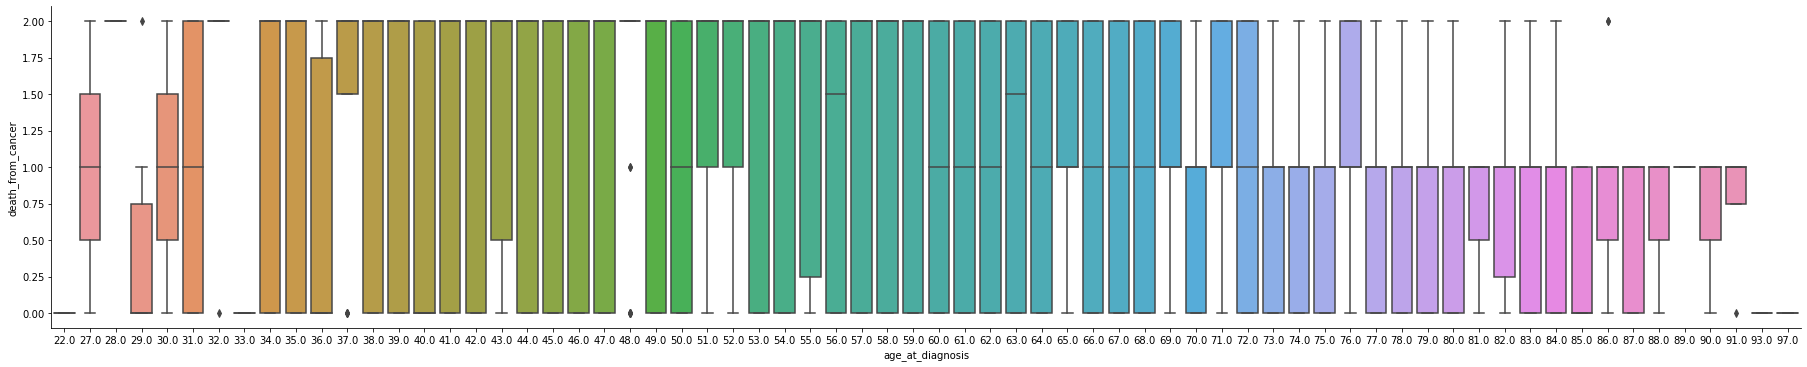

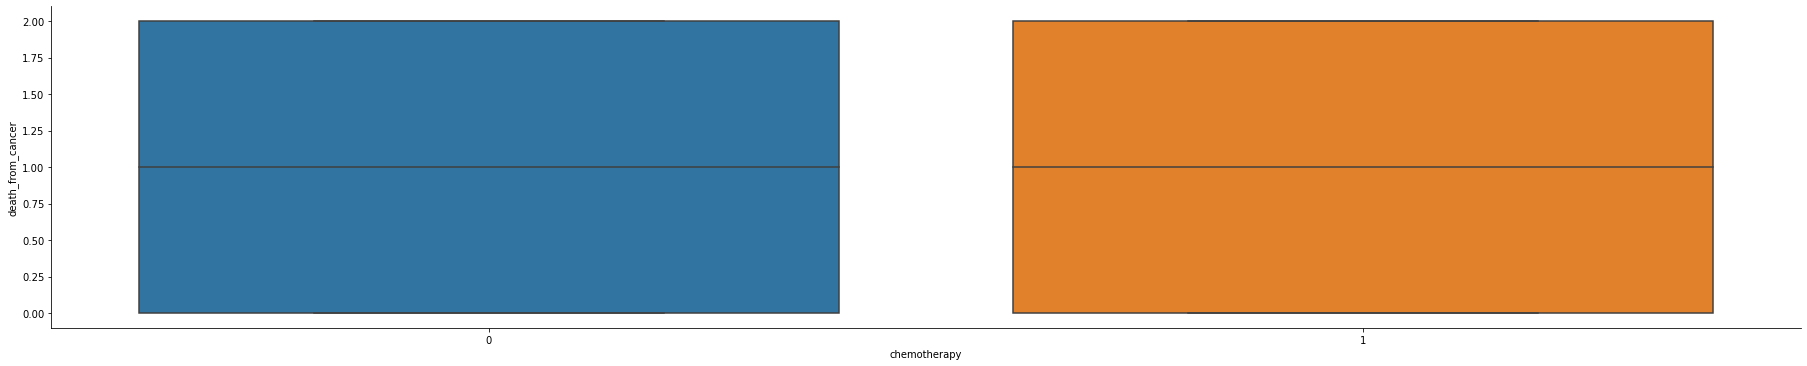

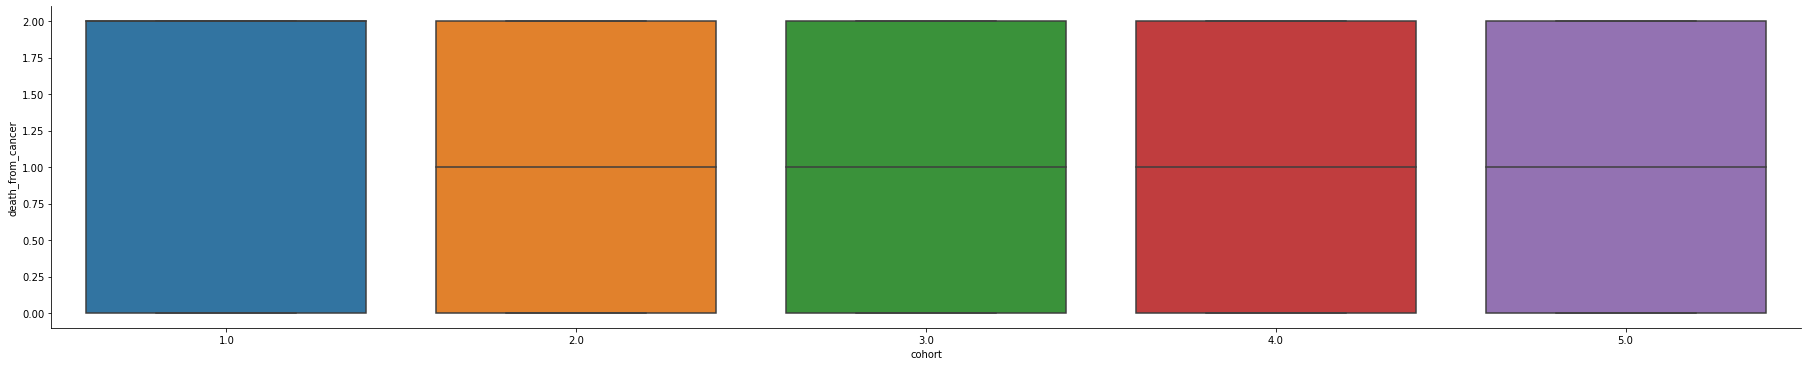

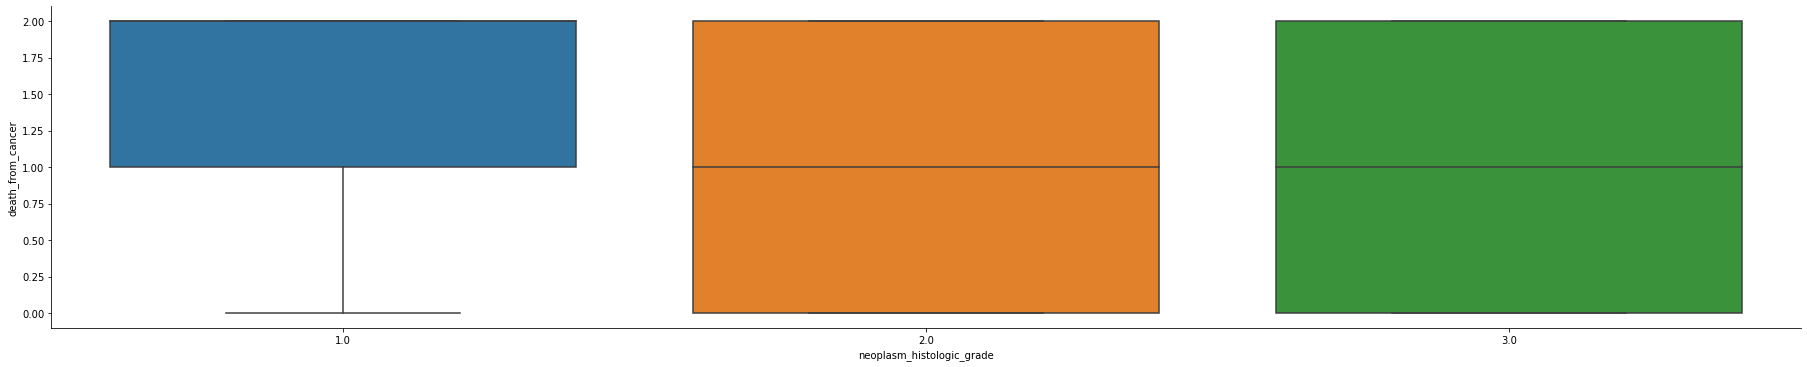

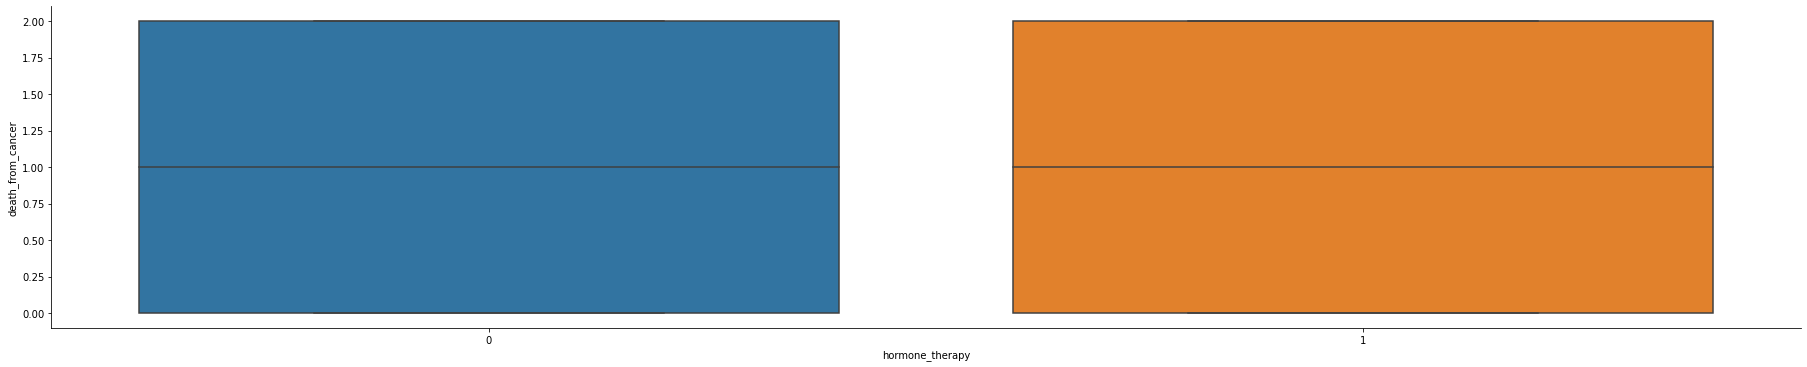

In [30]:
for i in df[df.columns[:5]]:
    sns.catplot(x=i, y='death_from_cancer', data=df, height=5, aspect=5, kind='box')
    plt.show()

### Correlation Matrix between Numerical Clinical Data

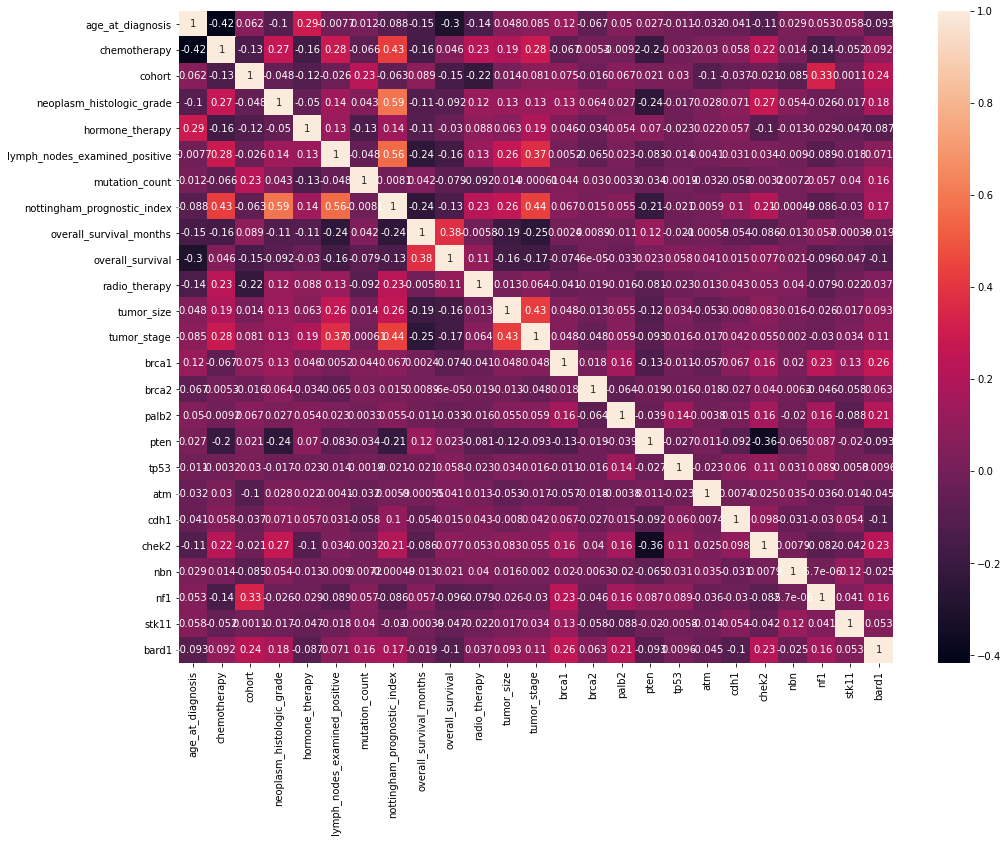

In [31]:
corr_matrix = new_clinic_data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Update Data Set

In [32]:
new_clinic_data.shape

(1904, 25)

In [33]:
new_df = df.drop(new_clinic_data.columns, axis = 1, inplace = False)
new_df = new_df.join(new_clinic_data)
new_df.isnull().sum().sum()

0

## Treatment Types and Survivals

In [34]:
treatments = ['chemotherapy', 'hormone_therapy', 'radio_therapy']

In [35]:
died = new_df[new_df['overall_survival']==0]
survived = new_df[new_df['overall_survival']==1]

C:\Users\Simran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Simran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Simran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


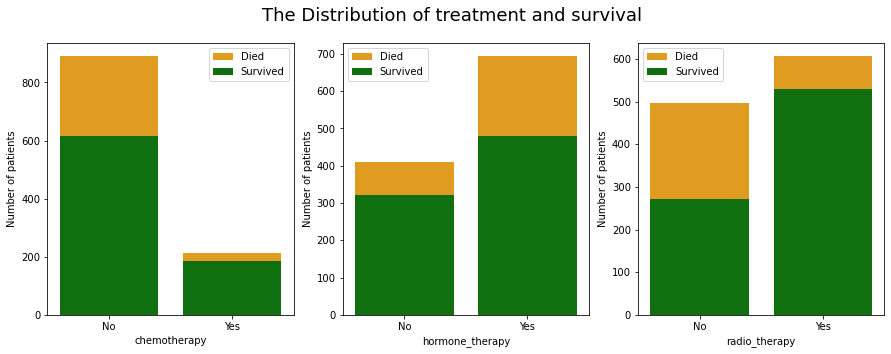

In [36]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

k = 0
for i in treatments:
    sns.countplot(died[i], color='orange', label='Died', ax=ax[k])
    sns.countplot(x= survived[i] , color='green', label='Survived', ax=ax[k])
    ax[k].legend()
    ax[k].set(xticklabels=['No','Yes'])
    ax[k].set_xlabel(i)
    ax[k].set_ylabel('Number of patients')
    k += 1

plt.show()

In [37]:
new_df[treatments]

,chemotherapy,hormone_therapy,radio_therapy
0,0,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,1
...,...,...,...
1899,0,1,1
1900,0,0,1
1901,0,1,1
1902,0,1,0


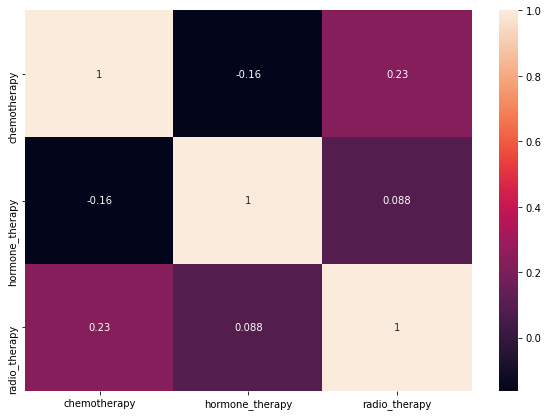

In [38]:
corr_matrix = new_df[treatments].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [41]:
pip install matplotlib_venn


  Using cached matplotlib-venn-0.11.7.tar.gz (29 kB)
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=89fab45d1585390c530af7b1fa77dacdc3eecf003c55c70fd40c99d021edc230
  Stored in directory: c:\users\simran\appdata\local\pip\cache\wheels\fb\24\13\4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


C:\Users\Simran\anaconda3\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


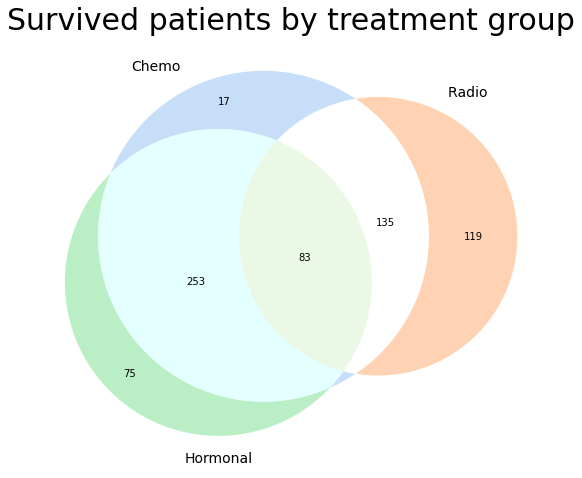

In [42]:
from matplotlib_venn import venn3

chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==False)]
radio = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
chemo_radio = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
radio_hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]
hormonal_chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
all_3 = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(10,8))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette("pastel"))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Survived patients by treatment group", size=30)
plt.show()